Loading package / other files

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import seaborn

Import and adapt df

In [55]:
importlib.reload(dm)
originial_df = pd.read_csv("data.txt", sep="\t")
df = dm.build_adapted_df(originial_df);df

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Series Name,,,,,,,,,,,,,,,,,,,,,
"Adolescents out of school, male (% of male lower secondary school age)",NaN,5.903310,NaN,NaN,NaN,NaN,5.570900,0.138270,7.776090,NaN,...,1.305430,4.398410,NaN,10.698010,NaN,NaN,9.226390,22.633860,NaN,NaN
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,1000.000000,100.000000,1900.000000,NaN,NaN,23000.000000,NaN,5500.000000,NaN,NaN,...,810.000000,4300.000000,NaN,NaN,9400.000000,NaN,NaN,870.000000,61000.000000,44000.000000
CO2 emissions (kt),5300.000191,4480.000019,154910.003662,NaN,469.999999,29760.000229,500.000000,183160.003662,5070.000172,NaN,...,6519.999981,105230.003357,180.000007,151070.007324,223720.001221,NaN,NaN,10850.000381,5320.000172,11020.000458
CO2 emissions from gaseous fuel consumption (kt),319.029000,161.348000,78741.491000,NaN,0.000000,1496.136000,0.000000,102268.963000,4191.381000,0.000000,...,106.343000,75012.152000,0.000000,48796.769000,20384.853000,NaN,0.000000,986.423000,0.000000,0.000000
"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)",2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,2.000000
Child employment in manufacturing (% of economically active children ages 7-14),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Child employment in manufacturing, female (% of female economically active children ages 7-14)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Child employment in manufacturing, male (% of male economically active children ages 7-14)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Military expenditure (% of general government expenditure),3.680251,3.787234,15.324398,NaN,NaN,12.399960,NaN,1.948955,15.122662,NaN,...,5.792367,NaN,NaN,NaN,8.774190,NaN,NaN,NaN,5.973466,184.076188


We can see there are many NaN : We can chose first to eleminate country with many NaN data (over 50% for example) that can bring outlier. But that value can be chose with the following graphic

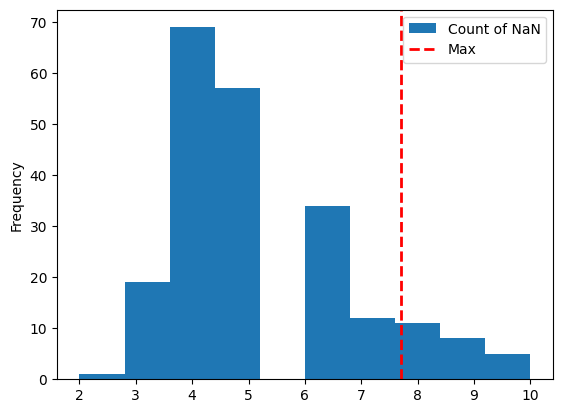

In [102]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan = df.shape[0]*0.7
plt.axvline(max_nan, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [103]:
importlib.reload(dm)

df_step1_clean = dm.del_many_na_country(df, df_nb_nan, median)
print(df_step1_clean)

Country Name                                        Afghanistan      Albania  \
Series Name                                                                    
Adolescents out of school, male (% of male lowe...          NaN     5.903310   
Adults (ages 15+) and children (ages 0-14) newl...  1000.000000   100.000000   
CO2 emissions (kt)                                  5300.000191  4480.000019   
CO2 emissions from gaseous fuel consumption (kt)     319.029000   161.348000   
CPIA transparency, accountability, and corrupti...     2.000000          NaN   
Child employment in manufacturing (% of economi...          NaN          NaN   
Child employment in manufacturing, female (% of...          NaN          NaN   
Child employment in manufacturing, male (% of m...          NaN          NaN   
Military expenditure (% of general government e...     3.680251     3.787234   
Oil rents (% of GDP)                                   0.000867     1.156511   
People practicing open defecation (% of 

step 2 avec les séries

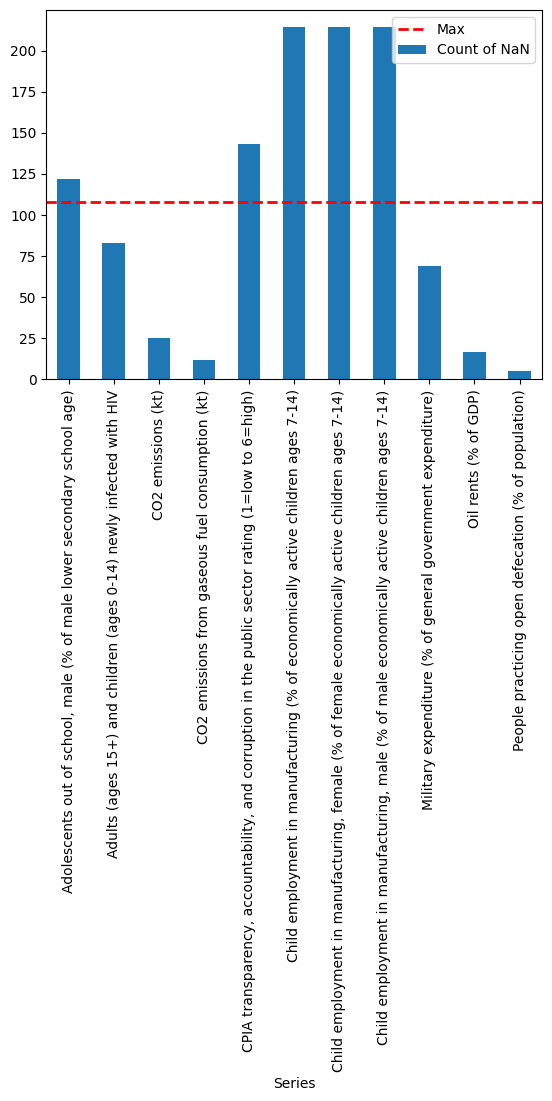

In [104]:
importlib.reload(dm)

df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN")
max_nan_s = df.shape[1]*0.5
plt.axhline(max_nan_s, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

on supprime quand au dessus de la barre

In [109]:
importlib.reload(dm)

df_step2_clean = dm.del_many_na_country(df, df_nb_nan_s, max_nan_s, True)
print(df_step2_clean)

                                                    NaN_count  \
Series Name                                                     
Adolescents out of school, male (% of male lowe...        122   
Adults (ages 15+) and children (ages 0-14) newl...         83   
CO2 emissions (kt)                                         25   
CO2 emissions from gaseous fuel consumption (kt)           12   
CPIA transparency, accountability, and corrupti...        143   
Child employment in manufacturing (% of economi...        214   
Child employment in manufacturing, female (% of...        214   
Child employment in manufacturing, male (% of m...        214   
Military expenditure (% of general government e...         69   
Oil rents (% of GDP)                                       17   
People practicing open defecation (% of populat...          5   

                                                                                               Series  
Series Name                                       

Maintenant on regarde si des données sont corrélé :

<AxesSubplot: xlabel='Series Name', ylabel='Series Name'>

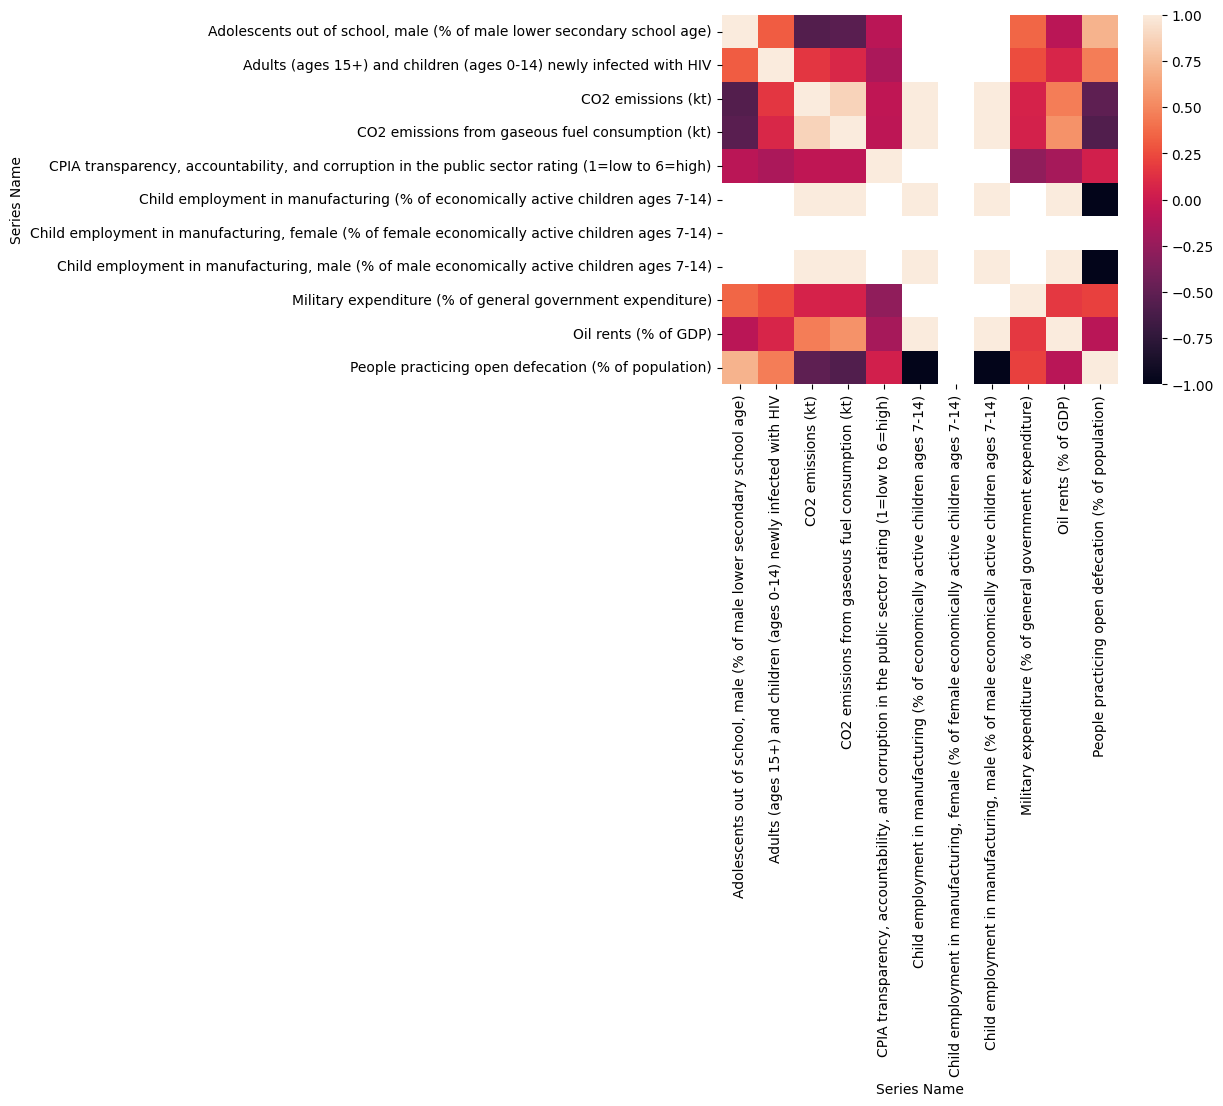

In [60]:
df_corr = df_step1_clean.T.corr("spearman")
seaborn.heatmap(df_corr)

Permet d'observer les différentes variables corrélés. On veut maintenant les supprimer

Series Name                                         Child employment in manufacturing, female (% of female economically active children ages 7-14)
Series Name                                                                                                                                       
Child employment in manufacturing, female (% of...                                                NaN                                             


c:\Users\Yanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Yanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot: xlabel='Series Name', ylabel='Series Name'>

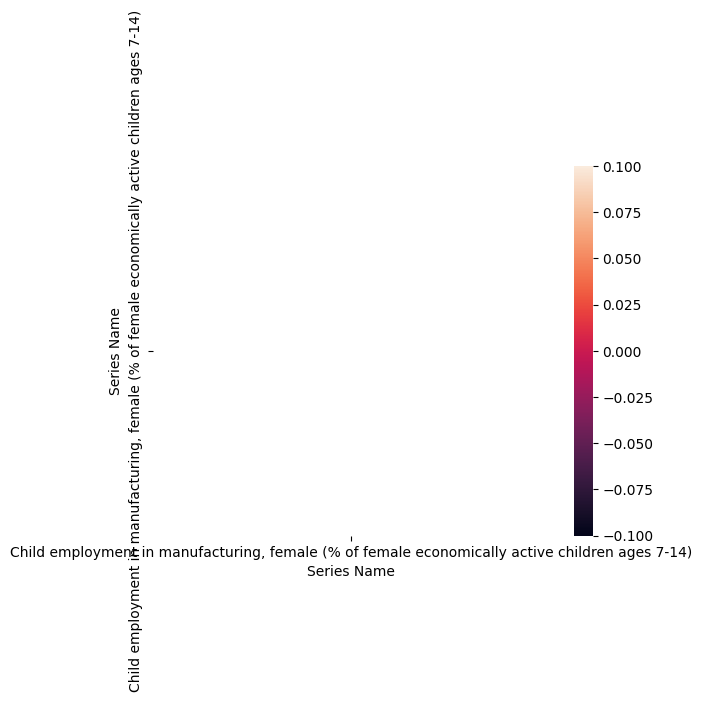

In [85]:
importlib.reload(dm)
df_step2_clean = dm.def_correled_series(df_step1_clean, df_corr, 1)
df_corr2 = df_step2_clean.T.corr("spearman")
print(df_corr2)
seaborn.heatmap(df_corr2)